## 1. PANDAS & NUMPY (25 points)

- complete 10 questions below
- for Pandas exercise, please use provided __sales_reps_data.csv__ file
- it would be a good idea to familiarise yourself with the .csv file first. 


In [1]:
# 1. load sales_reps_data.csv file with Pandas as dataframe
import pandas as pd
dataframe= pd.read_csv("sales_reps_data.csv")


In [3]:
# 2. print the first and last five rows
print(dataframe.head(),dataframe.tail())

         date   region sales_rep    item  qty  unit_price   total
0  01/06/2019     East     Jones  Pencil   95        1.99  189.05
1     1/23/19  Central    Kivell  Binder   50       19.99  999.50
2  02/09/2019  Central   Jardine  Pencil   36        4.99  179.64
3     2/26/19  Central      Gill     Pen   27       19.99  539.73
4     3/15/19     West   Sorvino  Pencil   56        2.99  167.44           date   region sales_rep    item  qty  unit_price    total
38    10/14/20     West  Thompson  Binder   57       19.99  1139.43
39    10/31/20  Central   Andrews  Pencil   14        1.29    18.06
40    11/17/20  Central   Jardine  Binder   11        4.99    54.89
41  12/04/2020  Central   Jardine  Binder   94       19.99  1879.06
42    12/21/20  Central   Andrews  Binder   28        4.99   139.72


In [6]:
#3. Find names of the sales reps who sold the most items (qty) and what are those items

dataframe.groupby(["sales_rep"]).sum().sort_values("total", ascending=False)

,qty,unit_price,total
sales_rep,,,
Kivell,193,173.93,3109.44
Parent,170,55.97,3102.30
Jardine,281,39.95,2812.19
Jones,396,55.92,2363.04
Gill,213,40.55,1749.87
Smith,156,141.29,1641.43
Morgan,173,26.47,1387.77
Sorvino,142,299.97,1283.61
Thompson,89,21.98,1203.11


In [ ]:
#Kivell sold the most items,Pencils.

In [13]:
# 4. Print details(records) for sales rep called 'Jones'
print(dataframe.loc[[0]])


         date region sales_rep    item  qty  unit_price   total
0  01/06/2019   East     Jones  Pencil   95        1.99  189.05


In [23]:
 #Get each item's highest price
newframe=dataframe['unit_price'].max()
print(newframe)

275.0


In [46]:
# 6. Find the average price of each unit
group = dataframe.groupby(["item","unit_price"]).average()


AttributeError: 'DataFrameGroupBy' object has no attribute 'average'

In [24]:
# 7. Sort all sales records by 'region' and 'total' columns
group = dataframe.groupby(["region","total"]).sum()
print(group)

                 qty  unit_price
region  total                   
Central 9.03       7        1.29
        18.06     14        1.29
        54.89     11        4.99
        68.37     53        1.29
        86.43     67        1.29
        131.34    66        1.99
        139.72    28        4.99
        149.25    75        1.99
        179.64    36        4.99
        249.50    50        4.99
        250.00     2      125.00
        251.72    28        8.99
        413.54    46        8.99
        449.10   180        9.98
        479.04    96        4.99
        539.73    27       19.99
        625.00     5      125.00
        686.95    55       12.49
        719.20    80        8.99
        999.50    50       19.99
        1005.90   42       23.95
        1305.00   87       15.00
        1879.06   94       19.99
East    19.96      4        4.99
        57.71     29        1.99
        174.65    35        4.99
        189.05    95        1.99
        255.84    16       15.99
        29

In [28]:
# 8.  Using NumPy create a 4X3 integer array from a range between 200 to 440  
# such that the difference between each element is 20
import numpy
sampleArray = numpy.arange(200, 440, 20)
sampleArray = sampleArray.reshape(4,3)
print (sampleArray)

[[200 220 240]
 [260 280 300]
 [320 340 360]
 [380 400 420]]


In [26]:
# 9. Create a new array like --> array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])
# then multiply every element in the array by 2.
numbers = [0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]
multiplied = []
for number in numbers:
    multiplied.append(number * 2)
print(multiplied)



[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]


In [25]:
# 10. Find the unique elements in an array [5,5,11,11,2,3,4,8,14,14,15,5]
def printDistinct(arr, n):
    for i in range(0, n):
        d = 0
        for j in range(0, i):
            if (arr[i] == arr[j]):
                d = 1
                break
 
        if (d == 0):
            print(arr[i])
     

arr = [5,5,11,11,2,3,4,8,14,14,15,5]
n = len(arr)
printDistinct(arr, n)


5
11
2
3
4
8
14
15


## 2. VISUALIZATION MATPLOTLIB (25 points / 15 points)


#### 25 points
- use already familiar __sales_reps_data.csv__ file 
- you need to process your data using grouby manupilation to prepare it for plotting (follow prompts below).
- you can see how the data should be shaped by checking __sales_resp_data_aggregated.csv__
- build a Pie Chart as described below. 

#### 15 points
- if you are not able to perform groupby operations to prepare data for plotting, then use __sales_resp_data_aggregated.csv__ file.
- build a Pie Chart as described below. 


In [39]:
# 1. load  sales_reps_data.csv file to a dataframe


# 2. Prepare a new subset from the original data, aggregating sales records by sales representative and summing up
# their total amount of sales (check sales_resp_data_aggregated.csv file to see what needs to be achieved)

"""
HINT: How to rename a column? 

 - sometimes when you group by column A and sum up colum B values, you lose the name of column B
 - below is the example of how to name the column B after group by
 - it is the equivalent of SQL: SELECT columnA, sum(columnB) as 'Total'

Example:
  new_df = <your groupby and sum code goes here>.reset_index(name ='total_amount')

"""

data= pd.read_csv("sales_reps_data_aggregated (2).csv")
print(data)

   sales_rep  total_amount  Unnamed: 2
0    Andrews        438.37         NaN
1       Gill       1749.87         NaN
2     Howard        536.75         NaN
3    Jardine       2812.19         NaN
4      Jones       2363.04         NaN
5     Kivell       3109.44         NaN
6     Morgan       1387.77         NaN
7     Parent       3102.30         NaN
8      Smith       1641.43         NaN
9    Sorvino       1283.61         NaN
10  Thompson       1203.11         NaN


In [41]:
import matplotlib
import matplotlib.pyplot as plt

data2 = data.total_amount
print(data2)

0      438.37
1     1749.87
2      536.75
3     2812.19
4     2363.04
5     3109.44
6     1387.77
7     3102.30
8     1641.43
9     1283.61
10    1203.11
Name: total_amount, dtype: float64


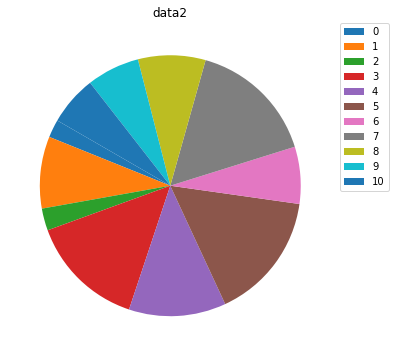

In [42]:
plt.figure(figsize=(10,6))
plt.title('data2')
plt.pie(data2,startangle=150,radius = 1)
plt.legend(labels=data2.index,bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


In [ ]:
# 3. Using matplotlib create a Pie plot to show proportion of sales contribution to the total sales by each sales rep. 




## 3. MACHINE LEARNING QUESTIONS (25 points)

- this is purely theoretical task, NO CODING required
- answer 5 questions below using Markdown cells to write your answers
- note that you only need to provide brief answers to each question in your own words and examples where applicable. 




### Q1: What is Machine Leanring?


### Q2: What are the key principles of 'Supervised' Machine learning?


### Q3: With regards to Machine Learning Model Fitting, what do we mean my Underfitting and Overfitting?


### Q4: Explain how do we ususally split data in preparation for the Machine Learning process?


### Q5: What is SciKit?


#q1Machine learning (ML) is a type of artificial intelligence (AI) that allows software applications to become more accurate at predicting outcomes without being explicitly programmed to do so.
q

q2
● Machine gets unlabeled input data.
● Machine infers hidden structure
from data.
● Machine returns the structure and
classifies data according to that
structure.

q3
A model is underfitting the training data when the model performs poorly on the training data. This is because the model is unable to capture the relationship between the input examples and the target values. A model is overfitting the training data when the model performs well on the training data but does not perform well on the evaluation data. This is because the model is memorizing the data it has seen and is unable to generalize to unseen examples

q4
Raw data is split into 2 partitions: training and testing sets.training set is used to develop a model and testing data is used to check the correctness of the system


q5
Scikit-learn is a machine learning library for Python. It features several regression, classification and clustering algorithms including SVMs, gradient boosting, k-means, random forests and DBSCAN. It is designed to work with Python Numpy and SciPy

## 4. DATA ANALYSIS NARRATIVE (25 points)

- this is purely theoretical task, NO CODING required
- please use provided PDF file DATA_FINAL_ASSESSMENT_Q4.pdf with the actual task descritpion and graphs /plots
- write your answers here in the Jyputer Notebook using a markdown cell. 




We have a data set with people of an average age of 38 and an average income of $60 000
the dataset has more females than males
as shown by the histogram,most of the clients are aged around 30,the least age is about 65.
at ages 20 and 70 we have more males and women aged 30 and 50 frequent more
most customers earn between $55000 and $85000
from the distribution of income ,it looks like the shop is frequented by more female high earners.
no correlation can be deduced from the scatter plot,except that most customers earn between $40 000 and $85000
There is a negative correlation between age and spending score
strong positive correlation between customerid and annual income
The lower the age,the higher the spending score
For women there is a high negative correlation between spending score and age,thenegative correlation is higher for men.
regression shows a negative correlation between age and spending score for women
The higher the income,the higher the spending score

